# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = 'https://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?lat={lats[i]}&lon={lngs[i]}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        # Parse the JSON and retrieve data
        city_weather = response['weather'][0]['main']
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lats[i]
        city_lng = lngs[i]
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = citipy.nearest_city(lats[i], lngs[i]).country_code
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
Processing Record 2 of Set 1 | nador
Processing Record 3 of Set 1 | bredasdorp
Processing Record 4 of Set 1 | tasiilaq
Processing Record 5 of Set 1 | leh
Processing Record 6 of Set 1 | barrow
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | mahebourg
Processing Record 9 of Set 1 | karratha
Processing Record 10 of Set 1 | east london
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | andrushivka
Processing Record 14 of Set 1 | qaanaaq
Processing Record 15 of Set 1 | butembo
Processing Record 16 of Set 1 | vila velha
Processing Record 17 of Set 1 | yen bai
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | grand river south east
Processing Record 20 of Set 1 | hamilton
Processing Record 21 of Set 1 | samusu
Processing Record 22 of Set 1 | tilichiki
Processing Record 23 of Set 1 | c

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          619
Lat           619
Lng           619
Max Temp      619
Humidity      619
Cloudiness    619
Wind Speed    619
Country       619
Date          619
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,illoqqortoormiut,79.384212,-12.474529,273.26,99,100,2.94,gl,1691803966
1,nador,34.440495,-3.357444,300.85,31,0,1.02,ma,1691803966
2,bredasdorp,-48.559871,20.238707,275.07,73,15,4.78,za,1691803966
3,tasiilaq,63.090670,-38.820978,282.76,60,100,2.11,gl,1691803967
4,leh,-54.027766,20.291476,272.55,85,58,9.76,za,1691803967


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,illoqqortoormiut,79.384212,-12.474529,273.26,99,100,2.94,gl,1691803966
1,nador,34.440495,-3.357444,300.85,31,0,1.02,ma,1691803966
2,bredasdorp,-48.559871,20.238707,275.07,73,15,4.78,za,1691803966
3,tasiilaq,63.090670,-38.820978,282.76,60,100,2.11,gl,1691803967
4,leh,-54.027766,20.291476,272.55,85,58,9.76,za,1691803967


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

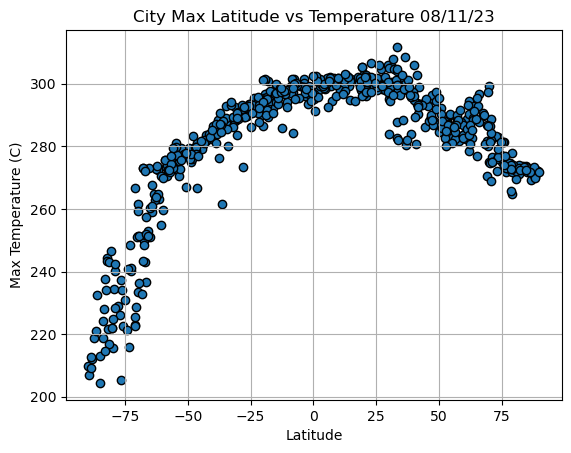

In [8]:
# Build scatter plot for latitude vs. temperature
latitude = city_data_df["Lat"]
temperature = city_data_df["Max Temp"]
plt.scatter(latitude, temperature, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title(f"City Max Latitude vs Temperature "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

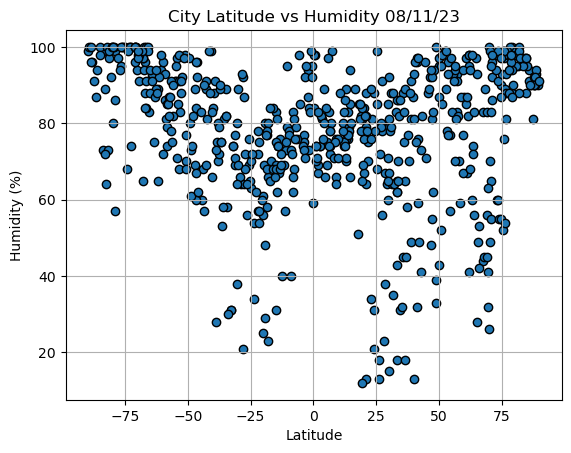

In [9]:
# Build the scatter plots for latitude vs. humidity
latitude = city_data_df["Lat"]
humidity = city_data_df["Humidity"]
plt.scatter(latitude, humidity, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

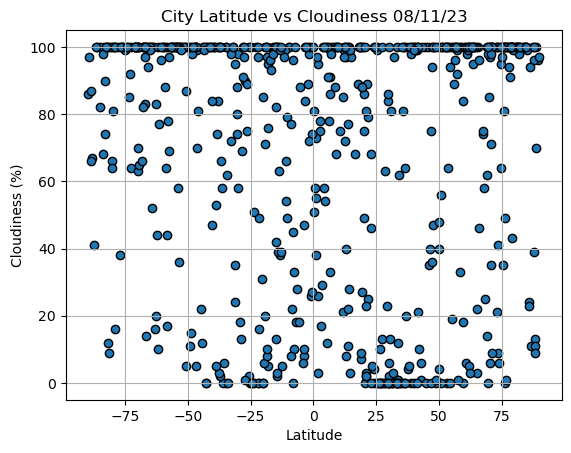

In [10]:
# Build the scatter plots for latitude vs. cloudiness
latitude = city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

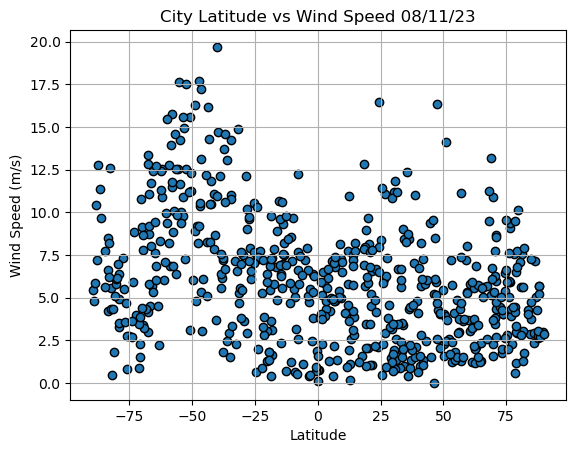

In [11]:
# Build the scatter plots for latitude vs. wind speed
latitude = city_data_df["Lat"]
wind_speed = city_data_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed "+ time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
x_values = city_data_df.Lat
y_values = city_data_df['Max Temp']

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,illoqqortoormiut,79.384212,-12.474529,273.26,99,100,2.94,gl,1691803966
1,nador,34.440495,-3.357444,300.85,31,0,1.02,ma,1691803966
3,tasiilaq,63.090670,-38.820978,282.76,60,100,2.11,gl,1691803967
5,barrow,33.444197,78.188811,287.86,65,1,1.89,in,1691803967
6,castro,84.671294,-148.042629,273.60,88,100,2.89,us,1691803968


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,bredasdorp,-48.559871,20.238707,275.07,73,15,4.78,za,1691803966
4,leh,-54.027766,20.291476,272.55,85,58,9.76,za,1691803967
7,mahebourg,-46.485345,-102.093563,281.17,96,99,5.33,cl,1691803968
8,karratha,-25.545871,63.188384,293.45,69,2,10.52,mu,1691803968
9,east london,-18.069615,113.303908,296.91,66,5,3.11,au,1691803968


###  Temperature vs. Latitude Linear Regression Plot

In [15]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.7508740224259774


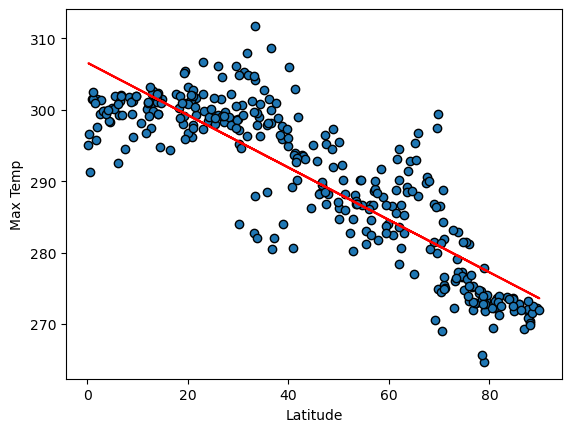

In [16]:
# Build the scatter plots for Northern Hemisphere Linear regression
latitude = northern_hemi_df["Lat"]
temperature = northern_hemi_df["Max Temp"]
plt.scatter(latitude, temperature, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

In [17]:
# Linear Regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.8105943839889107


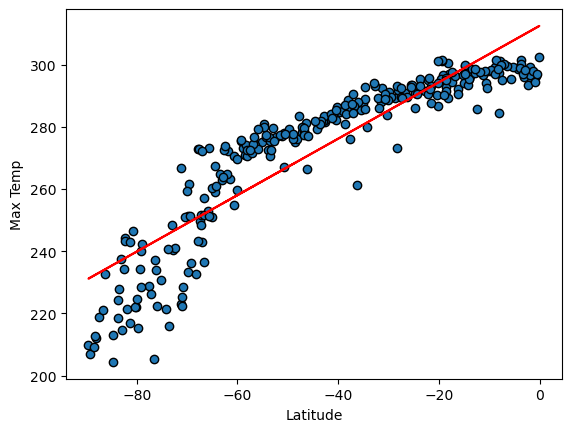

In [18]:
# Build the scatter plots for Southern Hemisphere Linear regression
latitude = southern_hemi_df["Lat"]
temperature = southern_hemi_df["Max Temp"]
plt.scatter(latitude, temperature, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship between latitude and maximum temperature varies within the Northern and Southern hemispheres. In the Northern hemisphere, the linear relationship is negative. This means that when latitude increases, maximum temperature decreases. However, in the Southern hemisphere, the linear relationship is positive. This means that when latitude increases, maximum temperature also increases.

### Humidity vs. Latitude Linear Regression Plot

In [19]:
# Linear Regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.059285162128804095


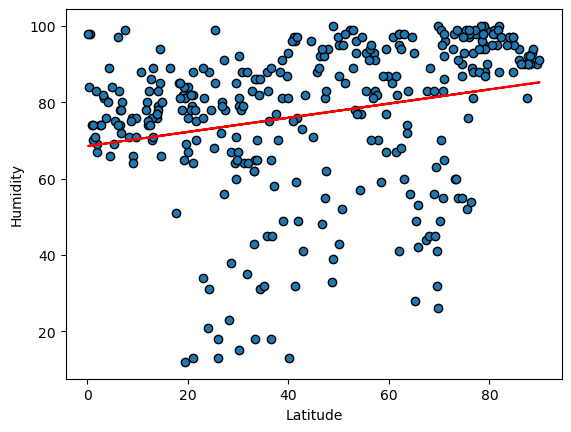

In [20]:
# Build the scatter plots for Northern Hemisphere Linear regression
latitude = northern_hemi_df["Lat"]
humidity = northern_hemi_df["Humidity"]
plt.scatter(latitude, humidity, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

In [21]:
# Linear Regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.2587967408220423


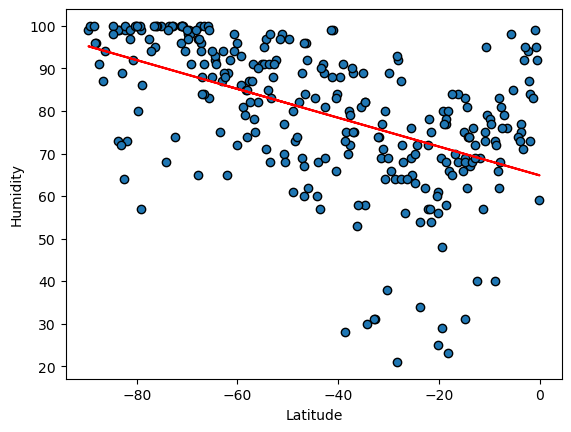

In [22]:
# Build the scatter plots for Southern Hemisphere Linear regression
latitude = southern_hemi_df["Lat"]
humidity = southern_hemi_df["Humidity"]
plt.scatter(latitude, humidity, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship between latitude and humidity is not very strong for both hemispheres. In the Northern Hemisphere, the relationship is slightly positive, indicating that as latitude increases, humidity also increases. In the Southern Hemisphere, the relationship is slightly negative, indicating that as latitude increases, humidity decreases.

### Cloudiness vs. Latitude Linear Regression Plot

In [23]:
# Linear Regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.03234120099497474


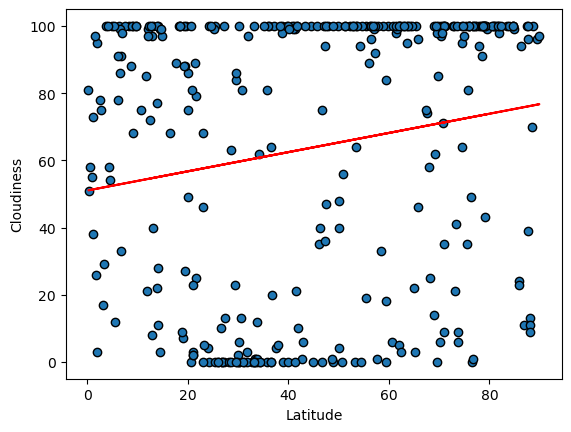

In [24]:
# Build the scatter plots for Northern Hemisphere Linear regression
latitude = northern_hemi_df["Lat"]
cloudiness = northern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

In [25]:
# Linear Regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.08474977845156646


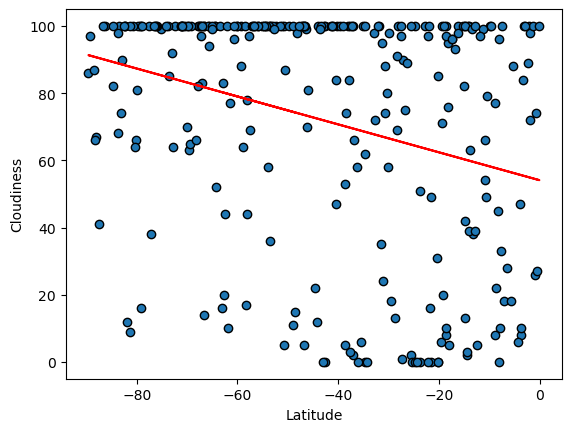

In [26]:
# Build the scatter plots for Southern Hemisphere Linear regression
latitude = southern_hemi_df["Lat"]
cloudiness = southern_hemi_df["Cloudiness"]
plt.scatter(latitude, cloudiness, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The linear relationship between latitude and cloudiness is not very strong for both hemispheres. In the Northern Hemisphere, the relationship is slightly positive, indicating that as latitude increases, cloudiness also increases. In the Southern Hemisphere, the relationship is slightly negative, indicating that as latitude increases, cloudiness decreases.

### Wind Speed vs. Latitude Linear Regression Plot

In [27]:
# Linear Regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.0004508932218108339


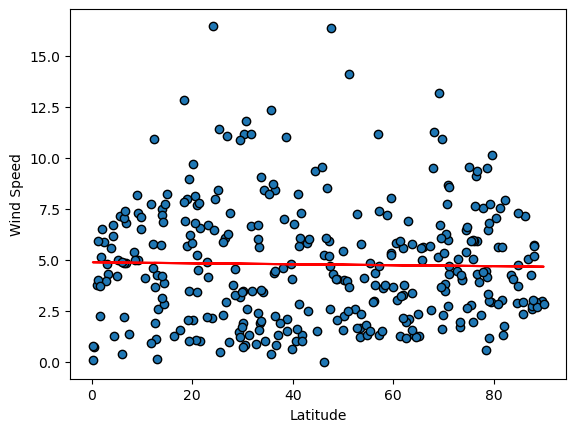

In [28]:
# Build the scatter plots for Northern Hemisphere Linear regression
latitude = northern_hemi_df["Lat"]
wind_speed = northern_hemi_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

In [29]:
# Linear Regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

The r value is: 0.028539938810811065


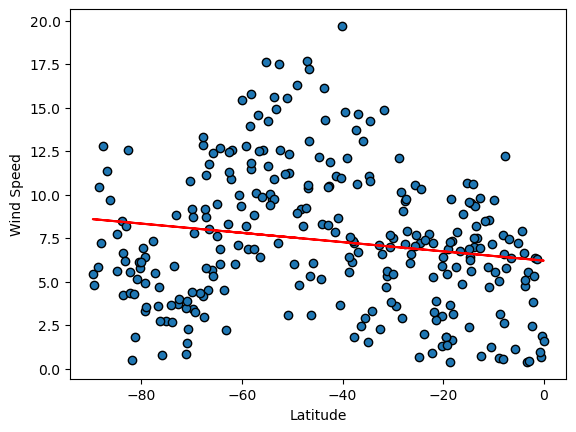

In [30]:
# Build the scatter plots for Southern Hemisphere Linear regression
latitude = southern_hemi_df["Lat"]
wind_speed = southern_hemi_df["Wind Speed"]
plt.scatter(latitude, wind_speed, edgecolor="black", marker="o")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.plot(x_values, regress_values, "r-")

# Show r value
print(f"The r value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** In both the Northern and Southern Hemispheres, the relationship between latitude and wind speed is very weakly negative. This means that when latitude increases, wind speed decreases.